In [34]:
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from keras.preprocessing import image 
from keras.applications import vgg16
from keras.layers import Dense, Dropout, Flatten
from keras import callbacks 
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [ ]:
# Method-1 (single images)

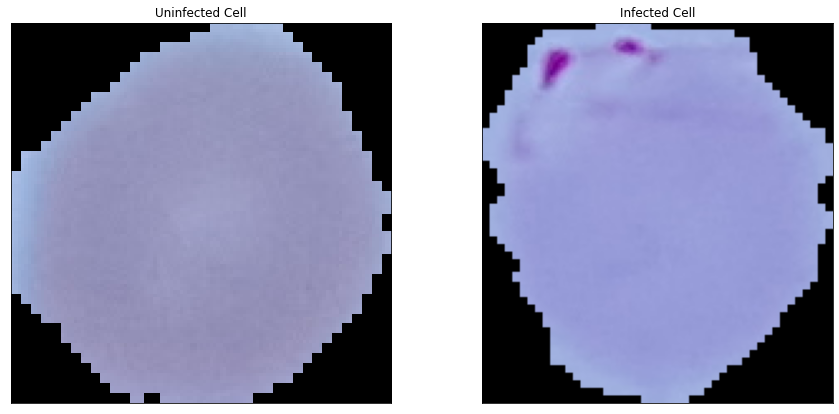

In [20]:
import cv2

uninfected= r'D:\Malaria\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_9.png'
infected = r'D:\Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(uninfected))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(infected))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
# Method-2 (using all images)

#PIL--> Python Imaging Library
#GLOB --> glob. glob() method returns a list of files or folders that matches the path specified in the pathname argument. 

In [29]:

from PIL import Image
import glob
x = []
y = []
for filename in glob.glob(r'D:\Malaria\cell_images\Parasitized\*.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(1)

for filename in glob.glob(r'D:\Malaria\cell_images\Uninfected\*.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    x.append(im)
    y.append(0)

In [ ]:
plt.imshow(x[658])

In [30]:
len(x),len(y)

(27558, 27558)

In [37]:
x=(np.array(x).astype(int))/255
y=(np.array(y))

In [32]:
x.shape

(27558, 64, 64, 3)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [39]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(64,64,3)),
                             tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                             tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.25),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(20, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(10, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid'),])


model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer="adam",metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=30, epochs=5, verbose=1, validation_data=(x_test,y_test))

Epoch 1/5


C:\Users\Hümeyra\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


735/735 [==============================] - 695s 944ms/step - loss: 0.6845 - accuracy: 0.5575 - val_loss: 0.6337 - val_accuracy: 0.6589
Epoch 2/5
735/735 [==============================] - 691s 940ms/step - loss: 0.5612 - accuracy: 0.7177 - val_loss: 0.2908 - val_accuracy: 0.9262
Epoch 3/5
735/735 [==============================] - 693s 942ms/step - loss: 0.2629 - accuracy: 0.9189 - val_loss: 0.1837 - val_accuracy: 0.9496
Epoch 4/5
735/735 [==============================] - 738s 1s/step - loss: 0.1809 - accuracy: 0.9416 - val_loss: 0.1687 - val_accuracy: 0.9521
Epoch 5/5
735/735 [==============================] - 697s 948ms/step - loss: 0.1370 - accuracy: 0.9554 - val_loss: 0.1488 - val_accuracy: 0.9525


In [40]:
_, accuracy=model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

173/173 [==============================] - 37s 215ms/step - loss: 0.1488 - accuracy: 0.9525
Accuracy: 95.25


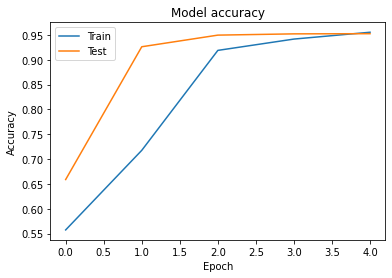

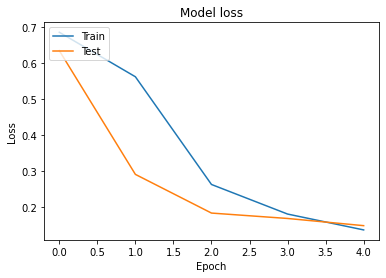

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [51]:
from PIL import Image
import glob
t = []

for filename in glob.glob(r'D:\Malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png'):
    im= np.array(Image.open(filename).resize((64,64)))
    t.append(im)

t=np.array(t).astype(int)/255

In [52]:
model.predict(t)

1/1 [==============================] - 0s 45ms/step


array([[0.99811876]], dtype=float32)